In [1]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
import pandas as pd
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [4]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
import matplotlib.pyplot as plt

In [6]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

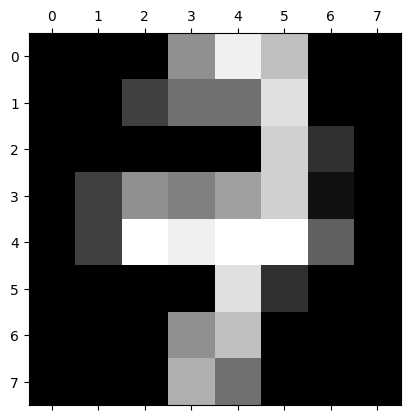

In [31]:
plt.gray()
plt.matshow(digits.images[43])

In [8]:
X = df
y = digits.target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state = 42)

In [10]:
model = KNeighborsClassifier(n_neighbors=7)

In [11]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
model.score(X_test,y_test)

0.9888888888888889

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Text(58.222222222222214, 0.5, 'Truth')

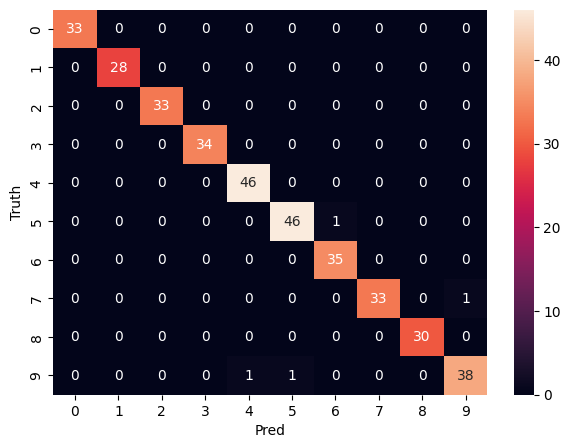

In [18]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Pred')
plt.ylabel('Truth')

In [20]:
report = classification_report(y_test,y_pred)

In [21]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [24]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNeighborsClassifier(),{ 'n_neighbors':[3,7,10,15]},cv = 5,return_train_score = False)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9833333333333333

In [25]:

clf.best_score_

0.9846883468834691

In [26]:
clf.best_params_

{'n_neighbors': 3}

In [28]:
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010518,0.006225,0.075178,0.049363,3,{'n_neighbors': 3},0.996528,0.975694,0.972125,0.996516,0.982578,0.984688,0.010230,1
1,0.005489,0.000130,0.031272,0.002123,7,{'n_neighbors': 7},0.989583,0.972222,0.979094,0.989547,0.972125,0.980514,0.007810,2
2,0.005559,0.000168,0.031063,0.000432,10,{'n_neighbors': 10},0.979167,0.968750,0.968641,0.989547,0.965157,0.974252,0.008973,3
3,0.007200,0.003925,0.055717,0.030067,15,{'n_neighbors': 15},0.979167,0.958333,0.961672,0.986063,0.972125,0.971472,0.010404,4
